In [1]:
from graphviz import Digraph

dot = Digraph()
dot.node("A", "Start")
dot.node("B", "End")
dot.edge("A", "B")
dot.render('flowchart', view=True)


'flowchart.pdf'

In [2]:
from graphviz import Digraph

def generate_flowchart(dsl_text, filename="flowchart", output_format="png"):

    dot = Digraph(comment="Flowchart", format=output_format)
    dot.attr(rankdir="LR", size="8,5")  # Left to Right layout
    
    # Split tokens
    tokens = [t.strip() for t in dsl_text.split("->") if t.strip()]
    
    nodes = {}
    
    for idx, token in enumerate(tokens):
        label = token
        node_type = "process"
        
        # Check for explicit type: NodeType:Label
        if ":" in token:
            parts = token.split(":", 1)
            node_type, label = parts[0].lower(), parts[1]
        
        # Create node IDs
        node_id = f"n{idx}"
        nodes[idx] = node_id
        
        # Style based on type
        if node_type == "start" or node_type == "end":
            dot.node(node_id, label, shape="oval", style="filled", color="lightblue")
        elif node_type == "decision":
            dot.node(node_id, label, shape="diamond", style="filled", color="lightyellow")
        else:  # default process
            dot.node(node_id, label, shape="box", style="rounded,filled", color="lightgrey")
        
        # Connect edge to previous node
        if idx > 0:
            prev_id = nodes[idx-1]
            dot.edge(prev_id, node_id)
    
    return dot


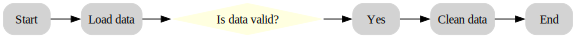

In [4]:
dsl = "Start -> Process:Load data -> Decision:Is data valid? -> Yes -> Process:Clean data -> End"

flow = generate_flowchart(dsl)
flow.render("flowchart", view=False)  # Saves to file
flow  # Display inline in Jupyter
